# Лабораторная работа №2
Датасет: результаты студентов на экзаменах по математике

In [22]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer

In [28]:
file_name = 'data1.csv'
file_path = f'{Path(os.getcwd()).parent}//data//{file_name}'
data = pd.read_csv(file_path, delimiter=',')

print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

## Задание 1
Устранение пропусков в данных;

In [29]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

all_data, filled_data, missed_data = impute_column(data, 'math score', 'mean')

print(filled_data)
print(missed_data)

[]
[]


## Задание 2
Кодирование категориальных признаков;

In [30]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['parental level of education'])

print(data['parental level of education'].unique())
print(np.unique(cat_enc_le))

['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
[0 1 2 3 4 5]


## Задание 3
Нормализация числовых признаков.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fd78072a9b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fd7801152a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fd78024c160>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fd78024c5b0>}

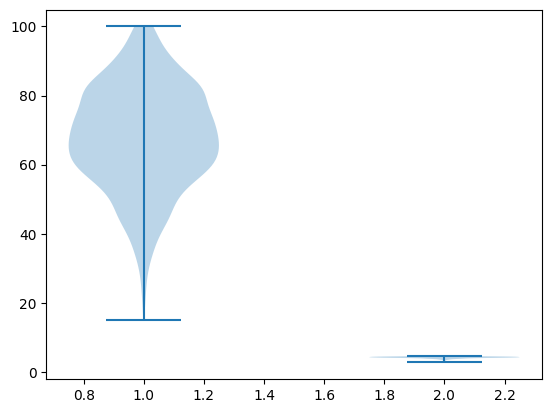

In [31]:
normalized_data = np.log(data['math score'])

plt.violinplot([data["math score"],
                normalized_data,
                ])